# Clustering clients by energy consumption

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)

In [3]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#### Exploração dos dados

In [4]:
#Visualizamos o formato do DF
dataset.shape

(2075259, 9)

In [5]:
# Damos uma olhada nos dados NA
dataset[dataset.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [6]:
# Cerca de 26k linhas com dados missing, como não equivale nem a 1% dos dados
dataset2 = dataset.dropna()

In [7]:
# Coletamos um sample de 1% dos dados
sample = dataset2.sample(frac=0.01, random_state=42).drop(columns=['Date', 'Time'])

In [8]:
# Aplicamos redução de dimensionalidade
sample_array = sample.values
train_data = PCA(n_components=2).fit_transform(sample_array)

In [9]:
train_data[:,0]

array([ 9.98859187, -7.55875567, -5.64997183, ..., -8.55529572,
       -5.98547512, 11.58395053])

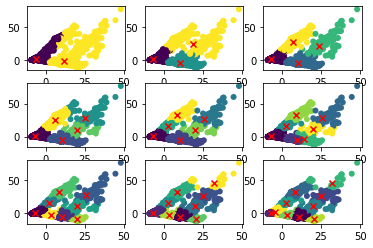

In [22]:
# Agora criamos vários modelos testando quantidades diferentes de clusters
Ks = range(2, 11)

inertia = []
silhouette = []

for K in Ks:
    kmean = KMeans(n_clusters=K, random_state=42)
    modelo = kmean.fit(train_data)
    #metricas.append({'K':K, 'inertia':modelo.inertia_, 'silhouette':silhouette_score(train_data, modelo.labels_)})
    inertia.append(modelo.inertia_)
    silhouette.append(silhouette_score(train_data, modelo.labels_))
    res = modelo.predict(train_data)

    plt.subplot(3, 3, K-1)
    plt.scatter(train_data[:,0], train_data[:,1], c = res, edgecolors= 'none')
    plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker = 'x', c='r')

plt.show()

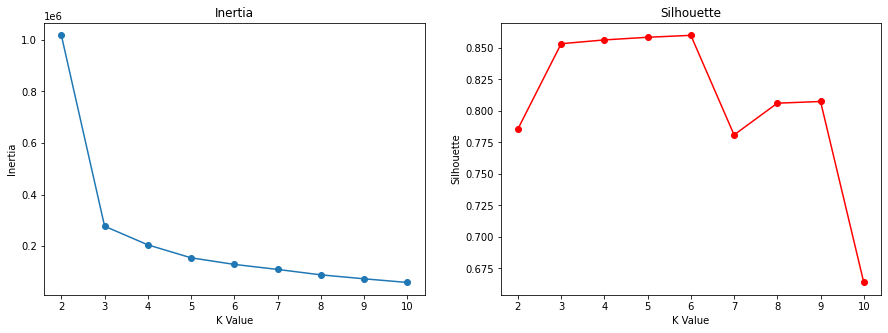

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(Ks, inertia, 'o-')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.title('Inertia')

plt.subplot(1,2,2)
plt.plot(Ks, silhouette, 'o-', c='r')
plt.xlabel('K Value')
plt.ylabel('Silhouette')
plt.title('Silhouette')

plt.show()

Olhando os Meshgrids e os gráficos de Inertia e Silhouette, vemos que o K Value = 6 apresentou os melhores resultados

In [42]:
# Agora criamos o modelo com o K Value como 6

km = KMeans(n_clusters=6, random_state=42)
modelo1 = km.fit(train_data)
previsao = modelo1.predict(train_data)


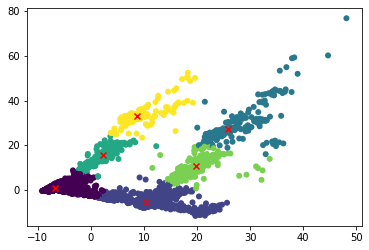

In [44]:
plt.scatter(train_data[:,0], train_data[:,1], c = previsao, edgecolors= 'none')
plt.scatter(modelo1.cluster_centers_[:,0], modelo1.cluster_centers_[:,1], marker = 'x', c='r')
plt.show()

In [49]:
sample['class'] = previsao

In [71]:
mean_table = sample[['Global_active_power','class']]
mean_table['Global_active_power'] = mean_table['Global_active_power'].astype('float')

In [83]:
mean_table.groupby('class').mean()

,Global_active_power
class,
0,0.518159
1,1.779762
2,4.614898
3,2.478909
4,3.774620
5,3.503943
